In [1]:
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import SGD, Adam, RMSprop
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


### The CIFAR-10 dataset contains 60,000 color images of 32 x 32 pixels in 3 channels divided into 10 classes. Each class contains 6,000 images. The training set contains 50,000 images, while the test sets provides 10,000 image

In [2]:
#from quiver_engine import server
# CIFAR_10 is a set of 60K images 32x32 pixels on 3 channels
IMG_CHANNELS = 3
IMG_ROWS = 32
IMG_COLS = 32

In [3]:
#constant
BATCH_SIZE = 200
NB_EPOCH = 20
NB_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

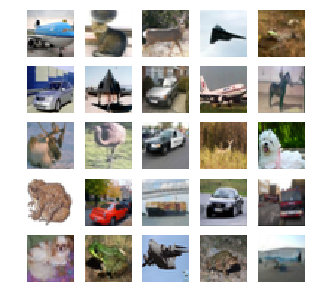

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from six.moves import cPickle 
from scipy.misc import toimage

# first time aroudn use the line below to get the data
# cifar10.load_data()

f = open('C:/users/Samar/.keras/datasets/cifar-10-batches-py/data_batch_1', 'rb')
datadict = cPickle.load(f, encoding='latin1')
f.close()
X = datadict["data"] 
Y = datadict['labels']
X = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")
Y = np.array(Y)
fig, axes1 = plt.subplots(5,5,figsize=(5,5))
for j in range(5):
    for k in range(5):
        i = np.random.choice(range(len(X)))
        axes1[j][k].set_axis_off()
        axes1[j][k].imshow(toimage(X[i:i+1][0]))

plt.show()

In [5]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [6]:
np.random.seed(100)
rand_indices_5000 = np.random.choice(range(50000),5000,replace=False)
rand_indices_1000 =  np.random.choice(range(10000),1000,replace=False)
X_train = X_train[rand_indices_5000]
X_test = X_test[rand_indices_1000]
y_train = y_train[rand_indices_5000]
y_test = y_test[rand_indices_1000]

In [7]:
print(rand_indices_5000[:10])

[ 4253 30076 48047  1666 30740 13830 34366  5893 45012 20187]


In [8]:
# Turn our labels into a OHE representation
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES)
print(Y_train[:5])

[[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]]


In [9]:
# Cast train, test sets to float32 and normalize by dividing by 255
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [10]:
model = Sequential()
# Add 32 convolutional filters of size 3 x 3 
# so number of parameters will be (3 * 3*3 + 1) * 32 = 896
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
# max pooling will give us a shape of 16,16,32
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               4194816   
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
__________

In [13]:
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,
        metrics=['accuracy'])

history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,
        epochs=10, validation_split=VALIDATION_SPLIT,
        verbose=VERBOSE)

print('Testing...')
score = model.evaluate(X_test, Y_test,
                     batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Train on 4000 samples, validate on 1000 samples
Epoch 1/10
4000/4000 [==============================] - 10s 2ms/step - loss: 2.0167 - acc: 0.2900 - val_loss: 1.8231 - val_acc: 0.3460
Epoch 2/10
4000/4000 [==============================] - 9s 2ms/step - loss: 1.7593 - acc: 0.3638 - val_loss: 1.8116 - val_acc: 0.3570
Epoch 3/10
4000/4000 [==============================] - 10s 3ms/step - loss: 1.6818 - acc: 0.4097 - val_loss: 1.7205 - val_acc: 0.4080
Epoch 4/10
4000/4000 [==============================] - 11s 3ms/step - loss: 1.6086 - acc: 0.4400 - val_loss: 1.7166 - val_acc: 0.4240
Epoch 5/10
4000/4000 [==============================] - 10s 2ms/step - loss: 1.5231 - acc: 0.4680 - val_loss: 1.5995 - val_acc: 0.4360
Epoch 6/10
4000/4000 [==============================] - 10s 2ms/step - loss: 1.4603 - acc: 0.4955 - val_loss: 1.5669 - val_acc: 0.4430
Epoch 7/10
4000/4000 [==============================] - 10s 2ms/step - loss: 1.4075 - acc: 0.5193 - val_loss: 1.6232 - val_acc: 0.4050
Epoch 8/

In [33]:
model_json = model.to_json()
open('cifar10_architecture.json', 'w').write(model_json)
model.save_weights('cifar10_weights.h5', overwrite=True)

In [27]:
Conv2D?

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


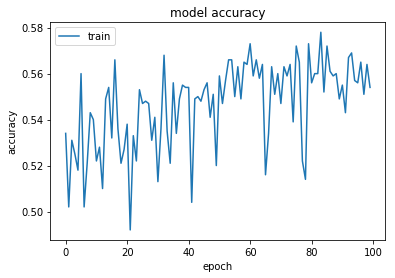

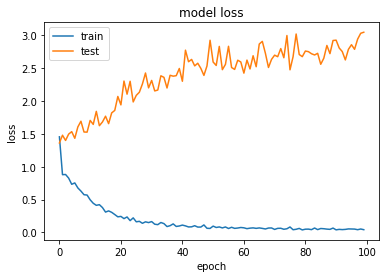

In [34]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [25]:
model = Sequential()

model.add(Conv2D(32, kernel_size=3, padding='same',
                        input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(Conv2D(32, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`


In [26]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_4 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_5 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        18496     
__________

In [27]:
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,
        metrics=['accuracy'])

In [28]:
X_train.shape

(5000, 32, 32, 3)

In [29]:
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,
        epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,
        verbose=VERBOSE)

Train on 4000 samples, validate on 1000 samples
Epoch 1/20
4000/4000 [==============================] - 31s 8ms/step - loss: 2.3066 - acc: 0.1148 - val_loss: 2.2332 - val_acc: 0.2230
Epoch 2/20
4000/4000 [==============================] - 37s 9ms/step - loss: 2.1836 - acc: 0.2137 - val_loss: 2.3182 - val_acc: 0.1780
Epoch 3/20
4000/4000 [==============================] - 34s 8ms/step - loss: 2.0314 - acc: 0.2605 - val_loss: 2.4126 - val_acc: 0.2030
Epoch 4/20
4000/4000 [==============================] - 34s 9ms/step - loss: 1.9523 - acc: 0.3183 - val_loss: 1.8275 - val_acc: 0.3580
Epoch 5/20
4000/4000 [==============================] - 33s 8ms/step - loss: 1.8326 - acc: 0.3365 - val_loss: 1.7523 - val_acc: 0.3630
Epoch 6/20
4000/4000 [==============================] - 32s 8ms/step - loss: 1.7878 - acc: 0.3610 - val_loss: 1.6863 - val_acc: 0.4050
Epoch 7/20
4000/4000 [==============================] - 32s 8ms/step - loss: 1.6949 - acc: 0.3937 - val_loss: 1.8164 - val_acc: 0.3440
Epoch 8

In [35]:
print('Testing...')
score = model.evaluate(X_test, Y_test,
                     batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Testing...
1000/1000 [==============================] - 3s 3ms/step

Test score: 3.02037596703
Test accuracy: 0.570000004768


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


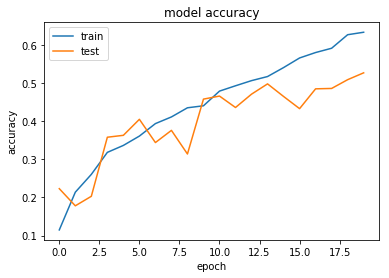

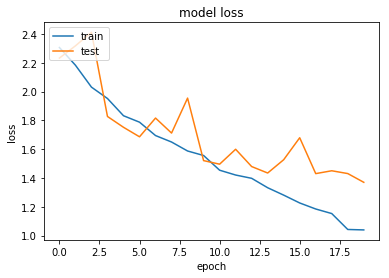

In [31]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()